#  DATA SCIENCE INTERN @ CODSOFT
## AUTHOR : RITIKA ROY CHOWDHURY
# TASK 2 : MOVIE RATING PREDICTION

## Importing necessary libraries

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Importing and Loading datasets

In [2]:
# importing dataset

# loading data rating
rating=pd.read_csv("Downloads/ratings.dat",sep = '::', engine='python')

# loading data movie
movie=pd.read_csv("Downloads/movies (2).dat",sep = '::',engine='python')

#loading data user
user=pd.read_csv("Downloads/users.dat",sep = '::', engine='python')

In [3]:
rating

,1,1193,5,978300760
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268
...,...,...,...,...
1000203,6040,1091,1,956716541
1000204,6040,1094,5,956704887
1000205,6040,562,5,956704746
1000206,6040,1096,4,956715648


In [4]:
user

,1,F,1.1,10,48067
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117
...,...,...,...,...,...
6034,6036,F,25,15,32603
6035,6037,F,45,1,76006
6036,6038,F,56,1,14706
6037,6039,F,45,0,01060


In [5]:
movie

,1,Toy Story (1995),Animation|Children's|Comedy
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller
...,...,...,...
3877,3948,Meet the Parents (2000),Comedy
3878,3949,Requiem for a Dream (2000),Drama
3879,3950,Tigerland (2000),Drama
3880,3951,Two Family House (2000),Drama


In [6]:
movie.columns =['MovieIDs','MovieName','Category']
movie.dropna(inplace=True)
movie.head()

,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [7]:
rating.columns =['ID','MovieID','Rating','Time-Stamp']
rating.dropna(inplace=True)
rating.head()

,ID,MovieID,Rating,Time-Stamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [8]:
user.columns =['UserID','Gender','Age','Occupation','Zip-code']
user.dropna(inplace=True)
user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [9]:
data = pd.concat([movie, rating, user], axis = 1)
data.head()  # our final dataset that we are going to use

,MovieIDs,MovieName,Category,ID,MovieID,Rating,Time-Stamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117


## Data Visualization

<AxesSubplot:>

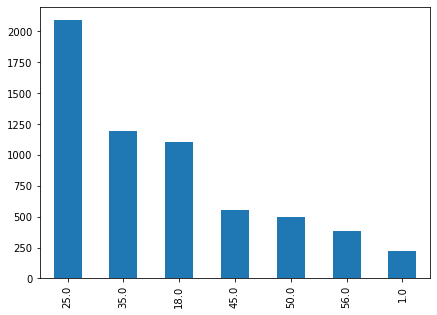

In [10]:
# User Age Distribution
data['Age'].value_counts().plot(kind = 'bar', figsize = (7, 5))

Text(0, 0.5, 'Count')

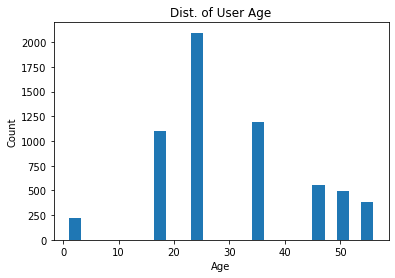

In [11]:
data.Age.plot.hist(bins = 25)

plt.title('Dist. of User Age')
plt.xlabel('Age')
plt.ylabel('Count')

In [12]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
data['age_group'] = pd.cut(data.Age, range(0, 81, 10), right = False, labels = labels)
data[['Age', 'age_group']].drop_duplicates()[:10]

,Age,age_group
0,56.0,50-59
1,25.0,20-29
2,45.0,40-49
4,50.0,50-59
5,35.0,30-39
16,18.0,10-19
17,1.0,0-9
6039,NaN,NaN


<AxesSubplot:>

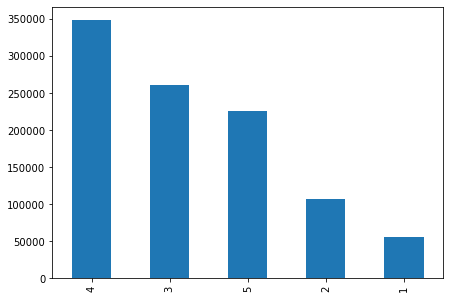

In [14]:
# Overall Rating by users
data['Rating'].value_counts().plot(kind = 'bar', figsize = (7, 5))

In [15]:
groupedby_movieName = data.groupby('MovieName')
groupedby_rating = data.groupby('Rating')
groupedby_uid = data.groupby('UserID')

In [16]:
movies = data.groupby('MovieName').size().sort_values(ascending = True)[: 1000]
movies

MovieName
$1,000,000 Duck (1971)                   1
Only Angels Have Wings (1939)            1
Only You (1994)                          1
Open Season (1996)                       1
Open Your Eyes (Abre los ojos) (1997)    1
                                        ..
Toy Story 2 (1999)                       1
Toys (1992)                              1
Total Eclipse (1995)                     1
Trading Places (1983)                    1
Tom & Viv (1994)                         1
Length: 1000, dtype: int64

In [17]:
totaleclipse_data = groupedby_movieName.get_group('Total Eclipse (1995)')
totaleclipse_data.shape

(1, 13)

Text(0.5, 1.0, 'User rating of "Total eclipse (1995)"')

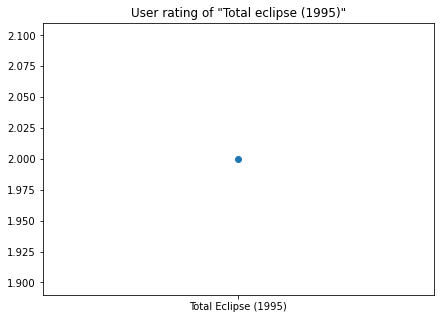

In [18]:
# Visualize user rating of 'Total Eclipse (1995)'
plt.figure(figsize = (7, 5))
plt.scatter(totaleclipse_data['MovieName'], totaleclipse_data['Rating'])
plt.title('User rating of "Total eclipse (1995)"')

In [19]:
# Viewrship of 'Total Eclipse (1995)' by age group
totaleclipse_data[['MovieName', 'age_group']]

,MovieName,age_group
199,Total Eclipse (1995),30-39


<AxesSubplot:>

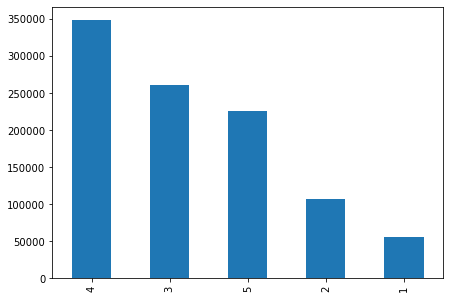

In [20]:
# Top 25 movies according to viewership rating
top25 = data[25:]
top25['Rating'].value_counts().plot(kind = 'bar', figsize = (7,5))

In [21]:
# Rating data by user id 7
uid7 = groupedby_uid.get_group(7)
uid7[['UserID', 'Rating']]

,UserID,Rating
5,7.0,5


## Machine Learning Algorithms

In [22]:
# first 500 extracted records
first500 = data[500:]
first500.dropna(inplace = True) # ignore warning

C:\Users\hp\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [23]:
# Use the following features :movie id,age,occupation
x = first500[['MovieID','Age','Occupation']].values



#Use rating as y
y = first500[['Rating']].values

In [24]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 3)

## Logistic Regression

In [25]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


32.53

## Support Vector Machines

In [26]:
svc = SVC()
svc.fit(x_train, y_train)
Y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
acc_svc

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


33.08

## K Nearest Neighbours Classifier

In [27]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


59.06

## Gaussian Naive Bayes

In [28]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


33.33

## Perceptron

In [29]:
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
Y_pred = perceptron.predict(x_test)
acc_perceptron = round(perceptron.score(x_train, y_train) * 100, 2)
acc_perceptron

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


33.08

## Linear SVC

In [30]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
Y_pred = linear_svc.predict(x_test)
acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)
acc_linear_svc

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


21.88

## Stochastic Gradient Descent

In [31]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
Y_pred = sgd.predict(x_test)
acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)
acc_sgd

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


12.25

## Decision Tree

In [32]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
Y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

98.1

## Random Forest

In [33]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(x_train, y_train)
Y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

C:\Users\hp\AppData\Local\Temp/ipykernel_15736/2109215741.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(x_train, y_train)


98.1

In [34]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest,98.10
8,Decision Tree,98.10
1,KNN,59.06
4,Naive Bayes,33.33
0,Support Vector Machines,33.08
5,Perceptron,33.08
2,Logistic Regression,32.53
7,Linear SVC,21.88
6,Stochastic Gradient Decent,12.25


# THANK YOU